# Consolidación de Modelos

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Ignorar todos los warnings
warnings.filterwarnings("ignore")

In [2]:
base_original = pd.read_csv('query_3ec5aea3_20240410T153703.csv')

In [3]:
#Archivos resultado distancias
result_dist_out = pd.read_csv('outliers.csv',index_col=0)
result_dist_no_out = pd.read_csv('base_distancia_limpia.csv',index_col=0)

In [4]:
#Unificar archivos
result_combined_dist = pd.concat([result_dist_out, result_dist_no_out])


In [5]:
result_combined_dist = result_combined_dist[['reconfirma']]  # Seleccionar solo la columna reconfirma
# Renombrar la columna reconfirma a Outlier_Distancias
result_combined_dist.rename(columns={'reconfirma': 'Outlier_Distancias'}, inplace=True)

In [6]:
# Unir los DataFrames por el índice
base_original = base_original.join(result_combined_dist, how='left')

In [7]:
# Reemplazar False por 'Si' y True por 'No'
base_original['Outlier_Distancias'] = base_original['Outlier_Distancias'].map({False: 'Si', True: 'No'})

# Reemplazar NaN por 'No'
base_original['Outlier_Distancias'].fillna('No', inplace=True)

In [8]:
base_original['Outlier_Distancias'].value_counts()

Outlier_Distancias
No    594929
Si      5844
Name: count, dtype: int64

In [9]:
#Archivos resultado KNN
result_knn_out = pd.read_csv('final_data_outliers.csv',index_col=0)
result_knn_no_out = pd.read_csv('final_data_sin_outliers.csv',index_col=0)

In [10]:
result_combined_knn = pd.concat([result_knn_out, result_knn_no_out])

In [11]:
result_combined_knn = result_combined_knn[['outlier_best_knn']]  # Seleccionar solo la columna outlier_best_knn
# Renombrar la columna outlier_best_knn a Outlier_KNN
result_combined_knn.rename(columns={'outlier_best_knn': 'Outlier_KNN'}, inplace=True)

In [12]:
# Unir los DataFrames por el índice
base_original = base_original.join(result_combined_knn, how='left')

In [13]:
# Reemplazar True por 'Si' y False por 'No'
base_original['Outlier_KNN'] = base_original['Outlier_KNN'].map({True: 'Si', False: 'No'})

# Reemplazar NaN por 'No'
base_original['Outlier_KNN'].fillna('No', inplace=True)

In [14]:
#Identificar atipicos en ambos modelos
atipicos_urgen = base_original[(base_original['Outlier_Distancias'] == 'Si') & (base_original['Outlier_KNN'] == 'Si')]

In [15]:
conditions = [
    (base_original['Outlier_Distancias'] == 'Si') & (base_original['Outlier_KNN'] == 'Si'),
    (base_original['Outlier_Distancias'] == 'Si'),
    (base_original['Outlier_KNN'] == 'Si')
]

In [16]:
# Definir los valores correspondientes a las condiciones
values = ['Outlier urgente', 'Outlier importante', 'Otro outlier']


In [17]:
base_original['Marca'] = np.select(conditions, values, default='No Outlier')

In [18]:
category_counts = base_original['Marca'].value_counts()
category_counts

Marca
No Outlier            559567
Otro outlier           35362
Outlier importante      5489
Outlier urgente          355
Name: count, dtype: int64

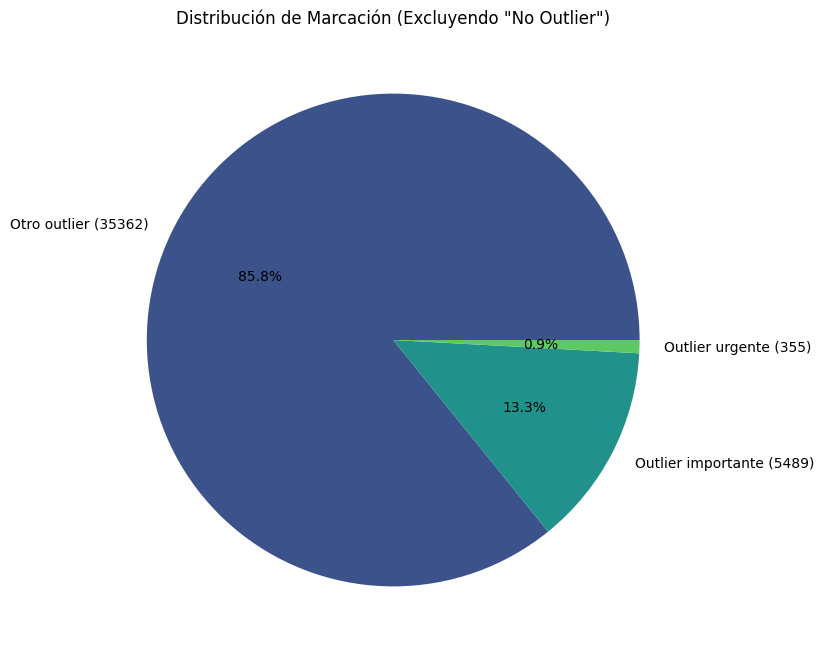

In [19]:

# Filtrar los datos para excluir la categoría 'No Outlier'
filtered_df = base_original[base_original['Marca'] != 'No Outlier']

# Contar la frecuencia de cada categoría en la columna 'marcación'
category_counts = filtered_df['Marca'].value_counts()

# Crear las etiquetas que muestren el porcentaje y el número absoluto
labels = [f'{cat} ({count})' for cat, count in zip(category_counts.index, category_counts.values)]

# Crear el gráfico de pastel
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=labels, autopct='%1.1f%%', colors=sns.color_palette("viridis", len(category_counts)))
plt.title('Distribución de Marcación (Excluyendo "No Outlier")')
plt.show()


In [21]:
# Crear una tabla de frecuencia cruzada para contar las categorías por 'nivel_1_cuenta' y 'marcación'
counts = pd.crosstab(base_original['nivel_1_cuenta'], base_original['Marca'])
counts

Marca,No Outlier,Otro outlier,Outlier importante,Outlier urgente
nivel_1_cuenta,,,,
Actividades En Oper. Conjuntas,164,0,0,0
Actividades Fiduciarias,502,5,13,0
Adecuación E Instalación,12264,72,75,0
Aportes A La Seguridad Social,35872,422,382,3
Arrendamientos,10248,53,64,0
Asesoría Financiera,6,0,0,0
Asesoría Jurídica,416,9,1,0
Bonificaciones,3642,4,37,0
Cesantias E Intereses A Las Cesantías,14526,90,151,2


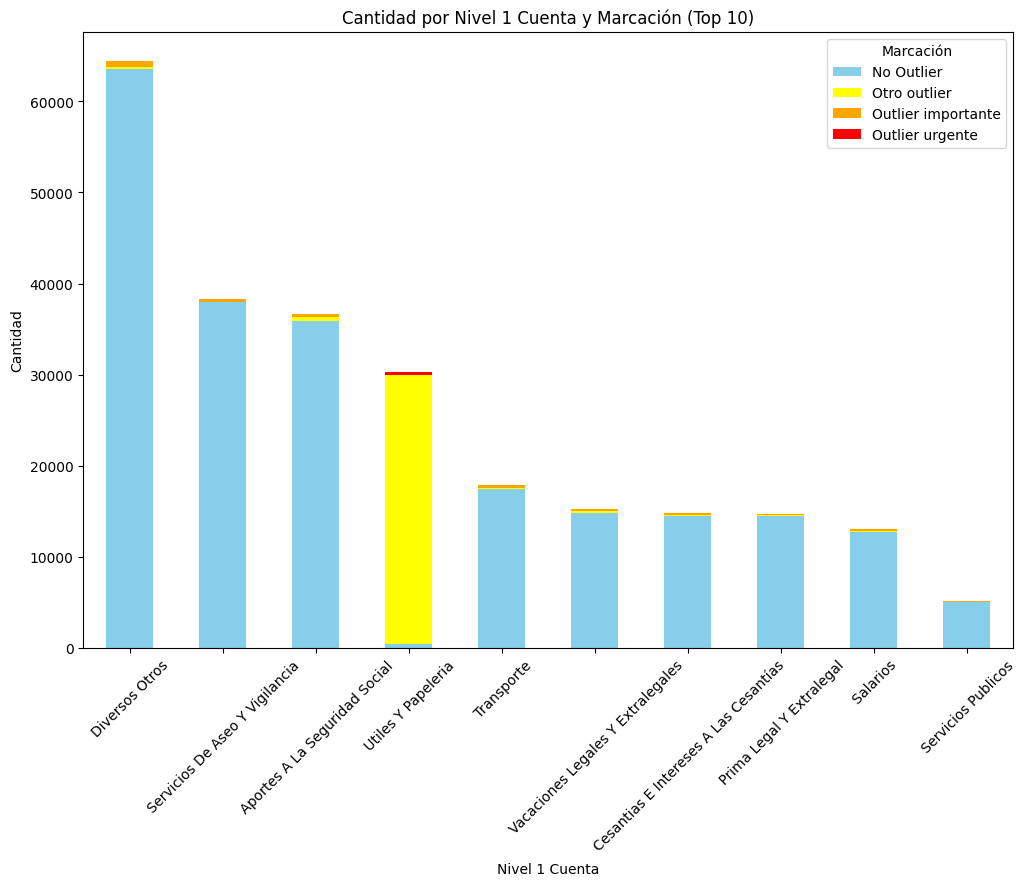

In [23]:
# Crear una tabla de frecuencia cruzada para contar las categorías por 'nivel_1_cuenta' y 'marcación'
counts = pd.crosstab(base_original['nivel_1_cuenta'], base_original['Marca'])

# Filtrar para obtener solo los nivel_1_cuenta que tienen todas las marcaciones con valores mayores que 0
required_categories = ['No Outlier', 'Otro outlier', 'Outlier importante', 'Outlier urgente']
filtered_counts = counts.loc[(counts[required_categories] > 0).all(axis=1)]

# Ordenar los datos por la suma de las filas y seleccionar los primeros 10
top_counts = filtered_counts.sum(axis=1).nlargest(10).index
top_counts = filtered_counts.loc[top_counts]

# Definir los colores para las categorías
colors = {
    'No Outlier': 'skyblue',
    'Otro outlier': 'yellow',
    'Outlier importante': 'orange',
    'Outlier urgente': 'red'
}

# Crear el gráfico de barras apiladas
top_counts.plot(kind='bar', stacked=True, figsize=(12, 8), color=[colors[col] for col in top_counts.columns])

# Añadir títulos y etiquetas
plt.title('Cantidad por Nivel 1 Cuenta y Marcación (Top 10)')
plt.xlabel('Nivel 1 Cuenta')
plt.ylabel('Cantidad')
plt.legend(title='Marcación')
plt.xticks(rotation=45)

plt.show()

In [24]:
result_final = base_original.to_csv('Base_completa_marcaciones.csv')